## **Amazon Sales Data Project:**

  Online retail sales is a recently exploded arena wherein businesses connect shops and people at home. Big players of the sector notably Amazon, Flipkart, alibaba etc. get orders day in and out. And there is always a need in a business to keep track of what's going around in their process to assess the performances, which means storing the record of orders or purchases. 

  Evaluation of performance happens with stats which has to be derived of the stacked data for which some tool is necessary. This is where our project finds it's spotlight. 

  In here is a sample dataset which is subset of tonnes of real world data. The steps involved in analysing the data such as data extraction, transformation, cleansing, EDA, data visualisation,etc. carried out. Here these processes are carried out using python which is a more reliable and widely used software tool. 

#**Problem Statement**

  Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business enterprise. So they want to do the Extract-Transform-Load some Amazon dataset and find Sales-trend -> month-wise, year-wise, yearly_month-wise for them

In [ ]:
#Initialising and importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The given dataset is loaded using read_csv function
data = pd.read_csv("/content/Amazon Sales data.csv")

In [ ]:
# The head function gives first 5 rows of the dataset to get an overview of the data types available and column names.
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
# Get the column names seperately
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
# info function gives detailed overview of datatypes,number of entries etc. in each row
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
# Get the number of unique entries in every column
print(data.nunique(axis = 0))

Region              7
Country            76
Item Type          12
Sales Channel       2
Order Priority      4
Order Date        100
Order ID          100
Ship Date          99
Units Sold         99
Unit Price         12
Unit Cost          12
Total Revenue     100
Total Cost        100
Total Profit      100
dtype: int64


In [ ]:
# Check if there are null entries. Fortunately nothing here, if nulls are available, removed using drop command.
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
# Data's date is organised and split for further processing
data[['Order Month','Order Date','Order Year']] = data['Order Date'].str.split('/',expand=True)

In [ ]:
data[['Ship Month','Ship Date','Ship Year']] = data['Ship Date'].str.split('/',expand=True)

In [ ]:
# Feature selection : Unwanted features are selected and dropped. 
data = data.drop(['Order ID','Order Date','Ship Date'],axis = 1)

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Ship Month,Ship Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,6,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,9,2012
2,Europe,Russia,Office Supplies,Offline,L,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,7,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2,2013


In [ ]:
# Describe function gives a summary of integer features available 
data.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


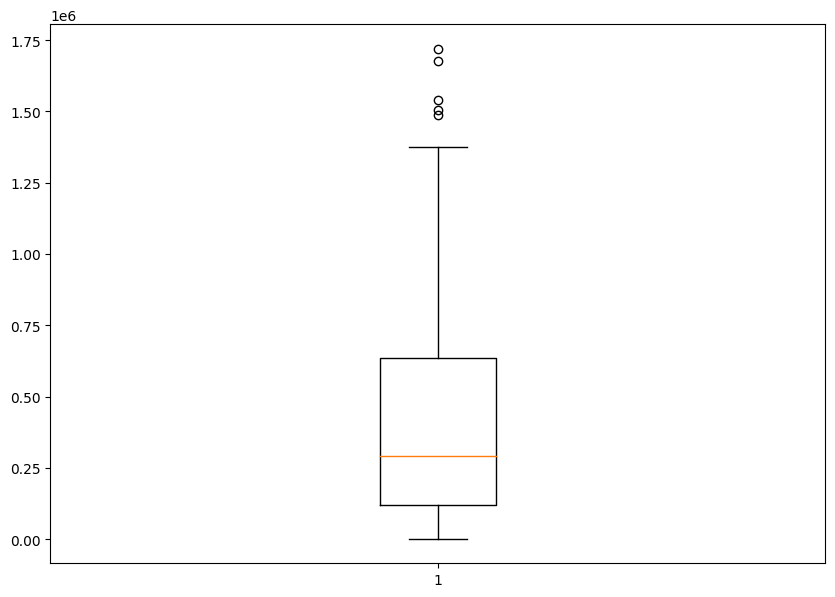

In [ ]:
# Outlier detection is done using boxplot, and the data over 75 percentile and below 25 percentile are removed. 
fig = plt.figure(figsize =(10,7))
plt.boxplot(data['Total Profit'])
plt.show()

In [ ]:
l = ['Units Sold',	'Unit Price',	'Unit Cost',	'Total Revenue',	'Total Cost',	'Total Profit']
## define Q1 and Q2
for i in range(len(l)):
  Q1 = np.percentile(data[l[i]],25)
  Q3 = np.percentile(data[l[i]],75)
  # # define IQR (interquantile range) 
  IQR = Q3 - Q1 
  upper = (Q3 + 1.5*IQR)
  lower = (Q1 - 1.5*IQR)
  data1 = data[(data[l[i]] < upper) & (data[l[i]] > lower)]
# # define df2 after removing outliers
data1.head(3)


,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Ship Month,Ship Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,6,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,9,2012
2,Europe,Russia,Office Supplies,Offline,L,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,5,2014


In [ ]:
# The shape of the data is checked post outlier removals.
data1.shape

(95, 15)

In [ ]:
# The 'units sold' is grouped and accumulated based on the 'region' and is sorted in descending order.
data1.groupby('Region') ['Units Sold'].sum().sort_values(ascending=False)

Region
Sub-Saharan Africa                   182870
Europe                                80589
Asia                                  59967
Australia and Oceania                 58671
Middle East and North Africa          38786
Central America and the Caribbean     26797
North America                         19143
Name: Units Sold, dtype: int64

In [ ]:
# The 'units sold' is grouped and accumulated based on 'region', 'item type'.
data1.groupby(['Region','Item Type'])['Units Sold'].sum()

Region                             Item Type      
Asia                               Clothes            14193
                                   Cosmetics           6952
                                   Fruits              6267
                                   Household          12080
                                   Office Supplies    11718
                                   Personal Care       4901
                                   Vegetables          3856
Australia and Oceania              Baby Food          12899
                                   Beverages          18768
                                   Cereal               682
                                   Clothes             9905
                                   Fruits              7585
                                   Meat                5908
                                   Office Supplies     2924
Central America and the Caribbean  Beverages           8156
                                   Cereal        

In [ ]:
# The 'Units sold','Total Profit' is grouped and accumulated based on the 'item type' and is sorted in descending order.
data1.groupby('Item Type') ['Units Sold','Total Profit'].sum().sort_values(by = 'Total Profit',ascending=False)

,Units Sold,Total Profit
Item Type,,
Cosmetics,46644,8109992.28
Office Supplies,46967,5929583.75
Household,35753,5925344.69
Clothes,71260,5233334.40
Baby Food,40545,3886643.70
Cereal,25877,2292443.43
Vegetables,20051,1265819.63
Personal Care,48708,1220622.48
Beverages,56708,888047.28


In [ ]:
country_names = data1.Country.value_counts().index
country_val = data1.Country.value_counts().values

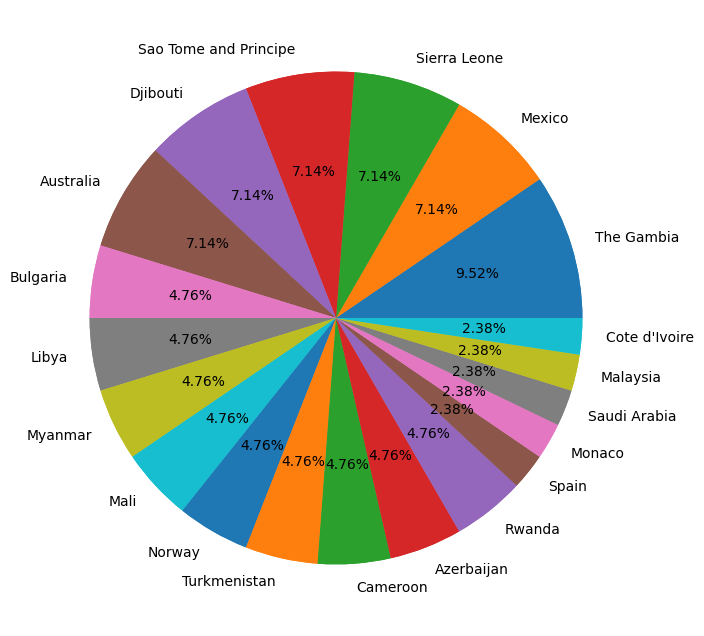

In [ ]:
fix,ax = plt.subplots(figsize=(8,8))
ax.pie(country_val[:20])
ax.pie(country_val[:20],labels= country_names[:20],autopct = '%1.2f%%')
plt.show()

In [ ]:
region_names = data1.Region.value_counts().index
region_val = data1.Region.value_counts().values

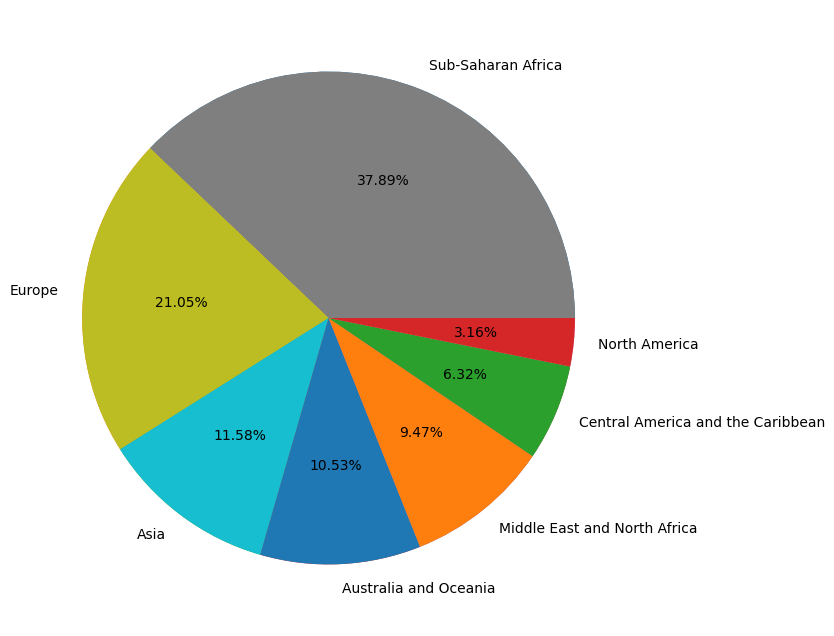

In [ ]:
fix,ax = plt.subplots(figsize=(8,8))
ax.pie(region_val[:20])
ax.pie(region_val[:20],labels= region_names[:20],autopct = '%1.2f%%')
plt.show()

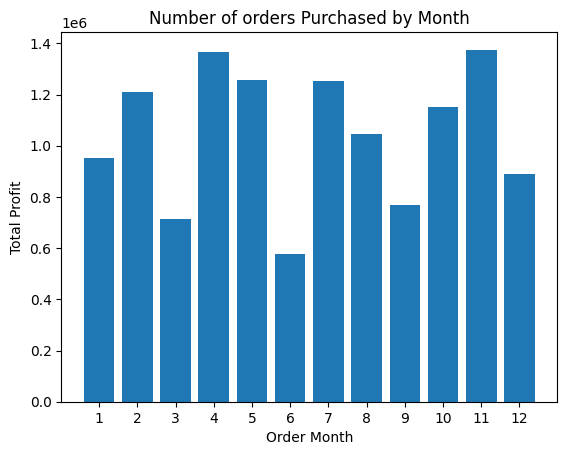

In [ ]:
#Create a bar chart for total profits and Order Month
plt.bar(data1['Order Month'].astype(int).sort_values(), data1['Total Profit'])

plt.title("Number of orders Purchased by Month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.show()

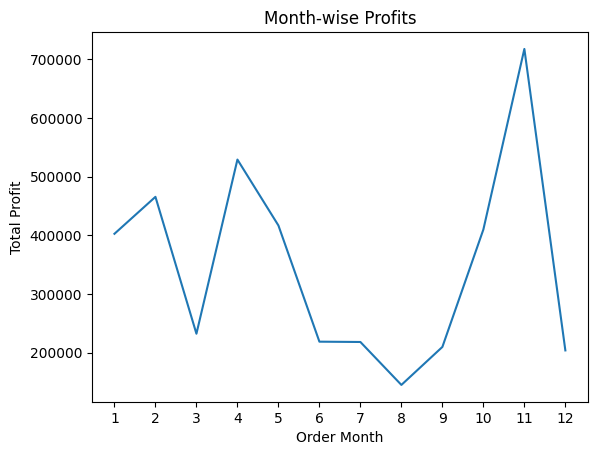

In [ ]:
#plot a line graph of total profit & Order month
data1.groupby(data1['Order Month'].astype(int).sort_values()) ['Total Profit'].mean().plot()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.title('Month-wise Profits')
plt.show()

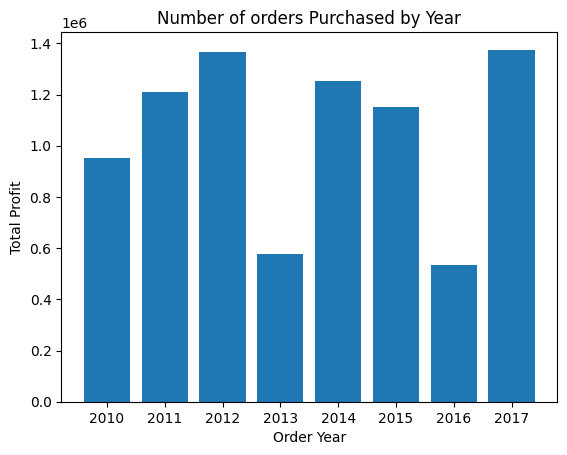

In [ ]:
#Create a bar chart for total revenue and Order Year
plt.bar(data1['Order Year'].astype(int).sort_values(), data1['Total Profit'])

plt.title("Number of orders Purchased by Year")
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.show()

In [ ]:
# The relationship between the features are assessed using the correlation matrix.
correlation = data1.corr()

<Axes: >

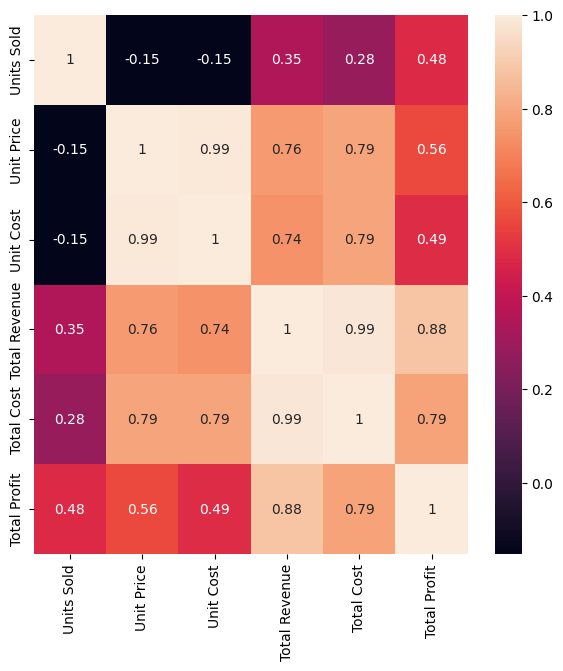

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns,
            annot = True)

In [ ]:
# data1.to_csv("Amazon Sales Analytics Project.csv")